In [18]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')





In [3]:
#get the stock quote
df =pd.read_csv("/content/drive/MyDrive/AAPL (1).csv") 
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575915,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643498,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783870,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917506,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897015,394024400
...,...,...,...,...,...,...,...
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.616829,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.786591,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.694427,133587600
2001,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.853210,128186000


In [4]:
#get the no of rows and columns in the dataset
df.shape


(2003, 7)

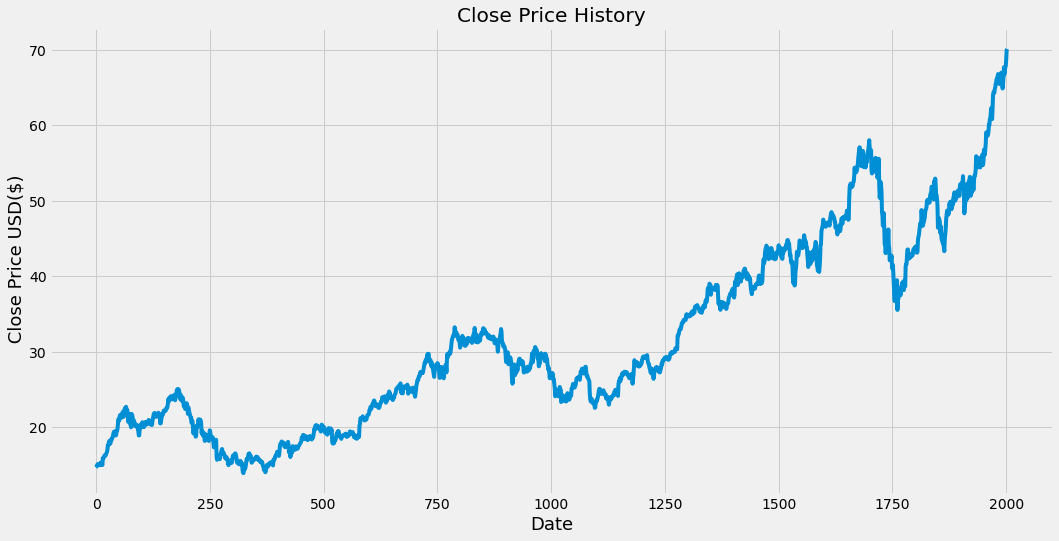

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel(' Close Price USD($)', fontsize=18)
plt.show()

In [6]:
#creating a new dataframe with only for the 'Close' Column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


1603

In [7]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0131651 ],
       [0.01457063],
       [0.01748986],
       ...,
       [0.97658262],
       [0.99755133],
       [1.        ]])

In [8]:
#create the training dataset
#create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#split the datab into x_train & y_train datasets
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806])]
[0.139492723007876]



In [9]:
#convert the x_train & y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
#Reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [19]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [26]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 44s 26ms/step - loss: 7.9555e-04


In [28]:
#Create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60: , :]
#create the data sets x_test & y_tests
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [29]:
#convert the data into a numpy array
x_test=np.array(x_test)

In [30]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [31]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [36]:
#get the RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.014158333908080998

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


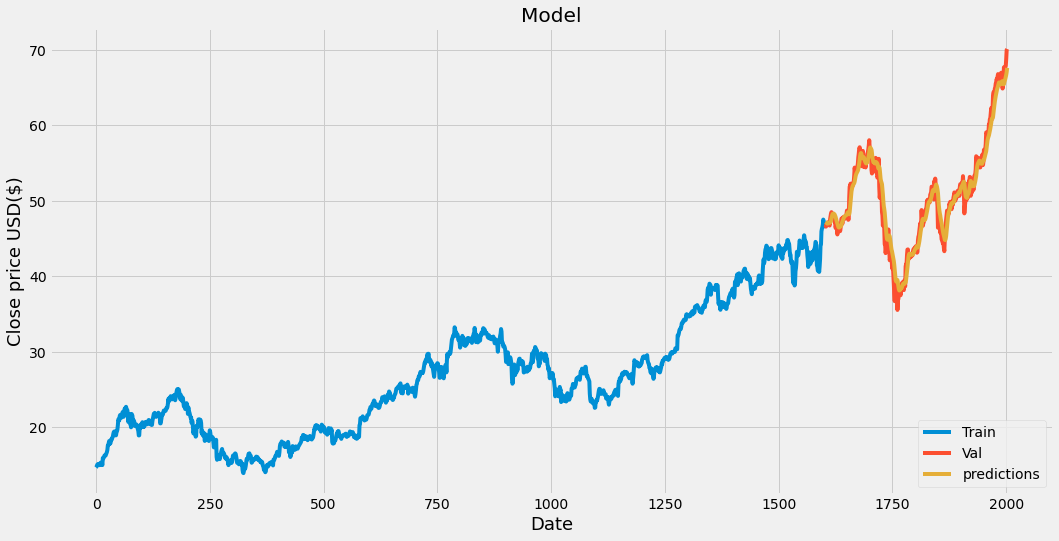

In [41]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()



In [42]:
#Show the valid & predicted prices
valid

,Close,Predictions
1603,46.747501,47.206738
1604,46.577499,47.166935
1605,46.907501,47.073898
1606,46.790001,47.021233
1607,47.090000,46.976311
...,...,...
1998,67.692497,66.136826
1999,67.864998,66.405334
2000,68.787498,66.678093
2001,69.964996,67.055069


In [47]:
#get the quote
df =pd.read_csv("/content/drive/MyDrive/AAPL (1).csv") 
#Create a new dataframe
new_df=df.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the dats between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#Append the past 60 days
x_test.append(last_60_days_scaled)
#convert the X_test datasets to a numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[[68.13313]]


In [49]:
#get the quote
df2 =pd.read_csv("/content/drive/MyDrive/AAPL (1).csv") 
print(df2['Close'])

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1998    67.692497
1999    67.864998
2000    68.787498
2001    69.964996
2002    70.102501
Name: Close, Length: 2003, dtype: float64
